# IDP Practice Final Sem 1 Answer Key

## Section 2: Query Related Questions 

In [ ]:
import pandas as pd


'''
Calculate and return the average budget for all movies
'''
def avg_budget(df):
    return df["Budget ($)"].mean()

'''
Calculate and return the average budget across all movies and handle the fact
that there are duplicate entries in the DataFrame.
'''
def avg_budget_correct(df):
    df = df.drop_duplicates()
    return avg_budget(df)

def count_movies(df):
    '''
    Return the count of unique movie Titles in the dataframe.
    '''
    # return len(df['Title'].unique())
    return df['Title'].nunique()


def warner_universal_over_8(df):
    '''
    Filter and return the titles of movies produced by 
    Warner Bros. or Universal Pictures that have a rating over 8.0 
    '''
    mask1 = df["Production Company"] == "Warner Bros. Pitcures"
    mask2 = df["Production Company"] == "Universal Pictures"
    mask3 = df["Rating"] >= 8.0
    return df[(mask1 | mask2) & mask3]["Title"].unique()


def actress_longer_than_6(df):
    '''
    Return a list of unique actresses that have a last name longer than 6 characters. 
    Sort the names alphabetically, by full name, in reverse. Z->A
    '''
    df2 = df.dropna()
    mask2 = df2['Actress'].apply(lambda name: len(name.split()[1]) > 6)
    df2 = df2[mask2]
    # alternatively to the above, we could do
    # mask1 = df["Actress"].str.split(' ').str[1].str.len() > 6
    # df2 = df[mask1]
    
    names = sorted(df2['Actress'].unique(), reverse=True)
    # names = list(df2['Actress'].sort_values(ascending=False).unique())

    return names


def top_5_box_office(df):
    '''
    Return the top 5 movies as a Series with the highest box office earnings
    '''
    df2 = df.nlargest(5, "Box Office ($)")
    return df2["Title"]


def avg_budget_1990s(df):
    '''
    Return the average budget for movies released in the 1990s (1990-1999).
    Assure that there are no duplicates.
    '''
    df = df.drop_duplicates()
    # this is not needed, but it gives us more confidence in the result
    df.fillna(0) 
    
    mask1 = (df["Year"] >= 1990) & (df["Year"] <= 1999)
    df2 = df[mask1]
    avg = df2["Budget ($)"].mean()
    return avg


def box_office_per_genre(df):
    '''
    Return the total box office earnings for each genre as a Series
    '''
    df = df.drop_duplicates()
    earnings = df.groupby("Genre")["Box Office ($)"].sum()
    return earnings


def highest_avg_director(df):
    '''
    Return the name of the director with the highest average movie rating
    '''
    ratings = df.groupby("Director")["Rating"].mean()
    
    # another way, but not as simple
    # return ratings.nlargest(1).index[0]
    
    return ratings.idxmax()


def top_5_most_movies_by_production_company(df):
    '''
    Return the list of the top 5 production companies with the most movies
    '''
    # handle duplicates by asking for unique()
    # but, get the count with nunique()
    counts = df.groupby("Production Company")["Title"].nunique()
    # counts is a Series of unique counts indexed by Production Company
    top_5 = counts.nlargest(5)
    # the production company name is the index, not the values
    return list(top_5.index)


def profit_per_movie(df):
    '''
    Calculate the profit (Box Office - Budget) for each movie and add it to a
    new column called 'Profit'. Return the new dataframe.
    '''
    df["Profit"] = df["Box Office ($)"] - df["Budget ($)"]
    return df


def blockbuster_or_flop(df):
    '''
    Classify each movie as a 'Blockbuster' if its Box Office is at least 200 
    and as a 'Flop' if its Box Office is less than 200. The new column name
    will be 'Success'. Return the new dataframe
    '''
    df['Success'] = df['Box Office ($)'].apply(lambda bo: 'Success' if bo >= 200 else 'Flop')
    return df


def top_5_after_2000(df):
    '''
    Return the list of Titles of the top 5 highest rated movies released after the year 2000
    '''
    # removes rows that are identical across all column values
    df = df.drop_duplicates()
    mask = df['Year'] > 2000
    top_5 = df[mask].nlargest(5, 'Rating')
    return list(top_5['Title'])
    


def run_query_questions(df):
    print(avg_budget(df))
    print(count_movies(df))
    print(avg_budget_correct(df))
    print(actress_longer_than_6(df))
    print(top_5_most_movies_by_production_company(df))
    # print(top_5_after_2000(df))
    pass
    

run_query_questions(pd.read_csv('movies.csv')) 

## Section 3: Data Visualization Questions

/tmp/ipykernel_34287/59125763.py:79: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  blue_month = df[mask_blue]['value'].resample('M').mean()
/tmp/ipykernel_34287/59125763.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orange_month = df[mask_orange]['value'].resample('M').mean()


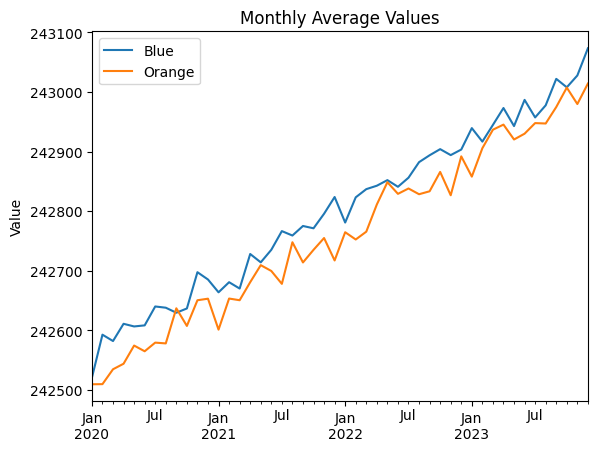

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# NO SEABORN


def movie_ratings_vs_years(df):
    '''
    Create a line plot of the average movie ratings over the years
    '''
    avg = df.groupby('Year')['Rating'].mean()
    avg.plot()
    plt.title('Average Movie Rating by Year')


def total_movies_per_production(df):
    '''
    Create a bar graph for the number of movies released by each production company
    '''
    count = df.groupby('Production Company')['Rating'].count()
    count.plot(kind='bar')
    plt.title('Movies Released by Production Company')

    
def drama_action_rating(df):
    '''
    Create a plot that displays the movie 'Rating' between 1990 and 2010 inclusive.
    Plot two lines, one for the genre 'Drama' and the other for the genre 'Action.' 
    Include a legend. Set the xticks to be every 5 years. Provide an appropriate y-label.
    '''
    # filter to the correct timeframe, and have 'Year' as the sorted index
    mask = (df['Year'] >= 1990) & (df['Year'] <= 2010)
    df = df[mask].set_index('Year').sort_index()
    
    # Get the series objects for the two genres
    mask = (df['Genre'] == 'Drama')
    drama = df[mask]['Rating']
    mask = (df['Genre'] == 'Action')
    action = df[mask]['Rating']
    
    drama.plot()
    action.plot()
    
    plt.title('Ratings for Drama and Action')
    plt.ylabel('Rating')
    plt.xticks([y for y in range(1990, 2011, 5)])
    plt.legend(['Drama', 'Action'])


def get_timeseries():
    # create DataFrame with hourly index
    df = pd.DataFrame(index=pd.date_range('2020-01-06', '2023-12-27'))
    
    # add a color
    colors = ['orange', 'green', 'blue']
    df['color'] = [ np.random.choice(colors) for n in range(len(df)) ]

    # add column of values
    df['value'] = df.index.year*120 + df.index.month*12 + np.random.randint(0, 200, size=len(df.index))
    df['value'] = df['value'] + df['color'].apply(lambda c: colors.index(c)*20)
    
    return df

    
def weekly_insight(df):
    '''
    df will be a TimeSeries with two columns, 'color' and 'value'.
    By definition, the TimeSeries is indexed by DateTime.
    Plot two lines on the same plot/figure. 
    The first line is the average monthly value for the color 'blue' across all data.
    The second line is the average monthly value for the color 'orange' across all data.
    Give the plot a title and label the axes.
    Show a legend.
    '''
    mask_blue = df['color'] == 'blue'
    mask_orange = df['color'] == 'orange'
    
    blue_month = df[mask_blue]['value'].resample('M').mean()
    orange_month = df[mask_orange]['value'].resample('M').mean()
    
    blue_month.plot()
    orange_month.plot()
    
    plt.ylabel('Value')
    plt.legend(['Blue', 'Orange'])
    plt.title('Monthly Average Values')

def run_visualizations(filename):
    df = pd.read_csv(filename)
    # movie_ratings_vs_years(df)
    # total_movies_per_production(df)
    # drama_action_rating(df)
    weekly_insight(get_timeseries())


run_visualizations('movies.csv')

## Section 4: Algorithmic Question

In [ ]:
def generate_sentence(start_node, nodes):
    current_node = start_node
    result = []

    unique = set()
    while current_node is not None and current_node in nodes:
        next_node, value = nodes[current_node]
        words = value.split()
        result.extend([word for word in words if word not in unique ])
        unique.update(words)
        current_node = next_node
        
    return ' '.join(result)

def test_generate_sentence():
    nodes = {
        'n1': ('n2', 'My'),
        'n2': ('n3', 'name'),
        'n3': ('n5', 'is'),
        'n4': ('n5', 'decoy'),
        'n5': (None, 'Mr. name Ed!')
    }
    print(generate_sentence('n1', nodes))
    
test_generate_sentence()